In [2]:
!pip install pydotplus

     -------------------------------------- 278.7/278.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=61e64c1b77453d8dce78d1083cca7ffa897ec3f2cc4496b4999b0a8e31d28798
  Stored in directory: c:\users\deepika\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from six import StringIO
import pydotplus
import seaborn as plt
from sklearn import tree
from sklearn.tree import export_graphviz

%matplotlib inline

In [4]:
df = pd.read_csv('C://Users//DEEPIKA//Documents//Machine Learning//C4.5 Decision Tree Algorithm//data_motor_mogok.csv')
df

,No.,Nama,Merek,Tahun,Jarak,Servis_Ringan,Mogok
0,1,Vario,Honda,5,234898,12,Mogok
1,2,Vario,Honda,2,74083,7,Tidak Mogok
2,3,Mio,Yamaha,5,244215,14,Mogok
3,4,Vario,Honda,3,86655,10,Tidak Mogok
4,5,Mio,Yamaha,7,277284,19,Mogok
5,6,Vario,Honda,4,113994,13,Tidak Mogok
6,7,Beat,Honda,4,92197,12,Tidak Mogok
7,8,Mio,Yamaha,5,231741,17,Mogok
8,9,Vario,Honda,6,259971,18,Mogok
9,10,Supra X,Honda,6,241230,15,Mogok


## Preprocessing

In [5]:
df.describe()

,No.,Tahun,Jarak,Servis_Ringan
count,60.000000,60.000000,60.000000,60.000000
mean,30.500000,4.266667,161824.916667,12.766667
std,17.464249,1.603668,72137.824693,4.526257
min,1.000000,2.000000,47004.000000,3.000000
25%,15.750000,3.000000,84006.500000,10.000000
50%,30.500000,4.000000,168326.500000,12.500000
75%,45.250000,5.000000,228179.000000,16.000000
max,60.000000,8.000000,299716.000000,25.000000


In [6]:
df.isnull().sum()

No.              0
Nama             0
Merek            0
Tahun            0
Jarak            0
Servis_Ringan    0
Mogok            0
dtype: int64

In [7]:
df.nunique()

No.              60
Nama             17
Merek             2
Tahun             7
Jarak            60
Servis_Ringan    18
Mogok             2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No.            60 non-null     int64 
 1   Nama           60 non-null     object
 2   Merek          60 non-null     object
 3   Tahun          60 non-null     int64 
 4   Jarak          60 non-null     int64 
 5   Servis_Ringan  60 non-null     int64 
 6   Mogok          60 non-null     object
dtypes: int64(4), object(3)
memory usage: 3.4+ KB


## Encoding

In [9]:
cols = ['Nama', 'Merek']

df[cols] = df[cols].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   No.            60 non-null     int64   
 1   Nama           60 non-null     category
 2   Merek          60 non-null     category
 3   Tahun          60 non-null     int64   
 4   Jarak          60 non-null     int64   
 5   Servis_Ringan  60 non-null     int64   
 6   Mogok          60 non-null     object  
dtypes: category(2), int64(4), object(1)
memory usage: 3.4+ KB


## Processing

In [10]:
df.drop(columns=['No.'], axis=1, inplace=True)
df_features = df.iloc[:,2:5]
df_target = df['Mogok']

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=3)

print('Train set :', X_train.shape, y_train.shape)
print('Test set :', X_test.shape, y_test.shape)

Train set : (42, 3) (42,)
Test set : (18, 3) (18,)


In [12]:
df_target

0           Mogok
1     Tidak Mogok
2           Mogok
3     Tidak Mogok
4           Mogok
5     Tidak Mogok
6     Tidak Mogok
7           Mogok
8           Mogok
9           Mogok
10          Mogok
11    Tidak Mogok
12          Mogok
13          Mogok
14          Mogok
15    Tidak Mogok
16    Tidak Mogok
17    Tidak Mogok
18          Mogok
19          Mogok
20    Tidak Mogok
21          Mogok
22    Tidak Mogok
23    Tidak Mogok
24    Tidak Mogok
25          Mogok
26    Tidak Mogok
27          Mogok
28    Tidak Mogok
29          Mogok
30    Tidak Mogok
31    Tidak Mogok
32          Mogok
33    Tidak Mogok
34          Mogok
35          Mogok
36    Tidak Mogok
37    Tidak Mogok
38    Tidak Mogok
39    Tidak Mogok
40    Tidak Mogok
41    Tidak Mogok
42    Tidak Mogok
43          Mogok
44    Tidak Mogok
45    Tidak Mogok
46    Tidak Mogok
47          Mogok
48    Tidak Mogok
49          Mogok
50    Tidak Mogok
51    Tidak Mogok
52          Mogok
53    Tidak Mogok
54          Mogok
55    Tida

In [13]:
X_train

,Tahun,Jarak,Servis_Ringan
30,2,75219,7
59,2,84682,7
45,3,183474,12
16,5,140606,16
15,5,239655,18
50,3,153943,11
11,2,75170,6
27,8,266104,20
7,5,231741,17
58,5,184743,16


## Modeling

In [14]:
from sklearn.tree import DecisionTreeClassifier

model_dtree = DecisionTreeClassifier(max_depth=3, criterion="entropy")
model_dtree.fit(X_train, y_train)
model_dtree

DecisionTreeClassifier(criterion='entropy', max_depth=3)

## Prediksi

In [15]:
y_pred = model_dtree.predict(X_test)

print(y_pred[0:5])
print(y_test[0:5])

['Mogok' 'Tidak Mogok' 'Mogok' 'Mogok' 'Tidak Mogok']
47          Mogok
18          Mogok
56          Mogok
13          Mogok
37    Tidak Mogok
Name: Mogok, dtype: object


## Evaluasi

In [16]:
from sklearn.metrics import accuracy_score

print('Akurasi Decision Tree :', accuracy_score(y_test, y_pred))

Akurasi Decision Tree : 0.7777777777777778


## Visualisasi

In [17]:
dot_data = StringIO()
filename = 'churn_tree.png'
featureName = df.columns[0:3]
targetName = df['Mogok'].unique().tolist()

out = tree.export_graphviz(model_dtree, feature_names=featureName, out_file=dot_data, class_names=np.unique(y_train), filled=True, 
                           special_characters=True, rotate=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

img = mpimg.imread(filename)
plt.figure(figsize=(200,100))
plt.imshow(img, interpolation='nearest')

InvocationException: GraphViz's executables not found

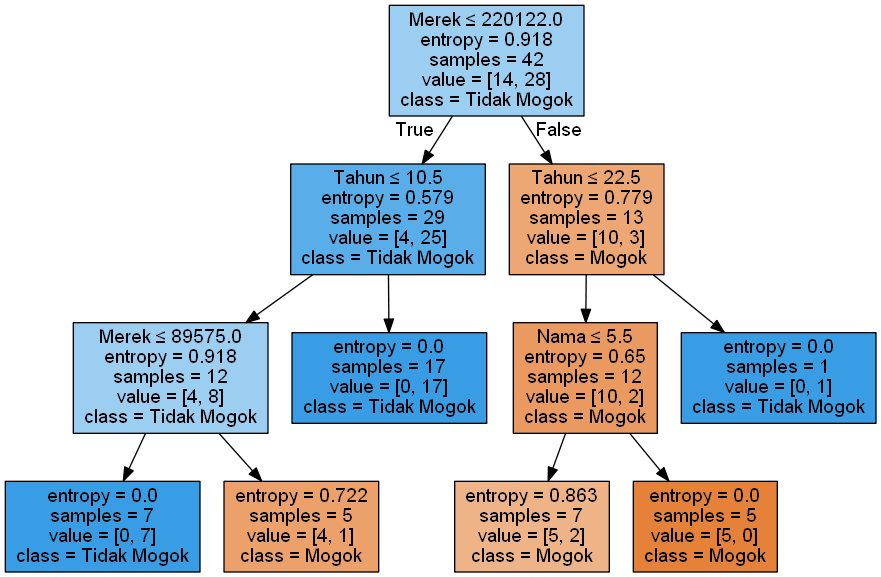